# Super Mario Party Analysis Report

This report provides an analysis of Super Mario Party data to help guide character selection.

## Table of Contents

- [Summary](#summary)
- [Setup](#setup)
- [Average Spaces Moved](#avg-spaces-moved)
- [Spaces Moved Variance](#spaces-moved-var)
- [Average Coins Earned](#avg-coins-earned)
- [Coins Earned Variance](#coins-earned-var)
- [Conclusion](#conclusion)

<a id='summary'></a>
## Summary

We can figure out the **expected value** of spaces moved for each character over a number of turn schemes using our stats knowledge (as presented in the `README.md` of this repo).

We scraped data for each character's dice block from [this website](https://miketendo64.com/2018/10/08/super-mario-party-character-dice-guide/). 

In this data set, a `c` character in a `die_side_i` column represent a coin roll (opposed to regular space roll).

We will compute the **expected value** of spaces moved and coins earned off of rolls for each character for games of 10, 15, 20, and 25 turns.

<a id='setup'></a>
## Setup

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the data
data = pd.read_csv("super_mario_party_characters_and_dice.csv")

# Preview the data
data.head()

,character,die_side_1,die_side_2,die_side_3,die_side_4,die_side_5,die_side_6
0,Mario,1,3,3,3,5,6
1,Luigi,1,1,1,5,6,7
2,Peach,0,2,4,4,4,6
3,Daisy,3,3,3,3,4,4
4,Wario,-2c,-2c,6,6,6,6


<a id='avg-spaces-moved'></a>
## Average Spaces Moved

The expected number of spaces moved over a set of n rolls is 

$\mathbf{E}[nX] = n\mathbf{E}[X]$ = $n\sum \frac{1}{6} * n$, $\forall n \in \{n_1, n_2, n_3, n_4, n_5, n_6\}$

where `n` is the number of rolls and $n_{i}$ is the roll outcome. Since you do not move any spaces when you roll a coin outcome, we will have to encode this as 0.

In [96]:
# Replace coin rolls with 0 and make all columns numeric
roll_columns = [x for x in data.columns if "die_side_" in x]
spaces_moved_df = data.copy()
spaces_moved_df[roll_columns] = spaces_moved_df[roll_columns].replace(regex=r'c', value=0).apply(pd.to_numeric)

# Preview changes to the data
spaces_moved_df.head()

,character,die_side_1,die_side_2,die_side_3,die_side_4,die_side_5,die_side_6
0,Mario,1,3,3,3,5,6
1,Luigi,1,1,1,5,6,7
2,Peach,0,2,4,4,4,6
3,Daisy,3,3,3,3,4,4
4,Wario,0,0,6,6,6,6


In [97]:
# Get the expected value of each roll
spaces_moved_df["expected_spaces_value"] = spaces_moved_df.sum(axis=1, numeric_only=True) / 6

# Compute the expected number of spaces under different turn amounts
turns = [10, 15, 20, 25]
for i in turns:
    spaces_moved_df[f"expected_spaces_{i}_turns"] = spaces_moved_df["expected_spaces_value"] * i

print(f"Expected Spaces Moved Per Character (Highest to Lowest)")

# Show the results
display(spaces_moved_df.drop(columns=roll_columns).sort_values(by="expected_spaces_value", ascending=False).reset_index(drop=True))

Expected Spaces Moved Per Character (Highest to Lowest)


,character,expected_spaces_value,expected_spaces_10_turns,expected_spaces_15_turns,expected_spaces_20_turns,expected_spaces_25_turns
0,Bowser,4.666667,46.666667,70.0,93.333333,116.666667
1,Boo,4.000000,40.000000,60.0,80.000000,100.000000
2,Wario,4.000000,40.000000,60.0,80.000000,100.000000
3,Mario,3.500000,35.000000,52.5,70.000000,87.500000
4,Dry Bones,3.500000,35.000000,52.5,70.000000,87.500000
5,Waluigi,3.500000,35.000000,52.5,70.000000,87.500000
6,Yoshi,3.500000,35.000000,52.5,70.000000,87.500000
7,Diddy Kong,3.500000,35.000000,52.5,70.000000,87.500000
8,Luigi,3.500000,35.000000,52.5,70.000000,87.500000
9,Koopa Troopa,3.333333,33.333333,50.0,66.666667,83.333333


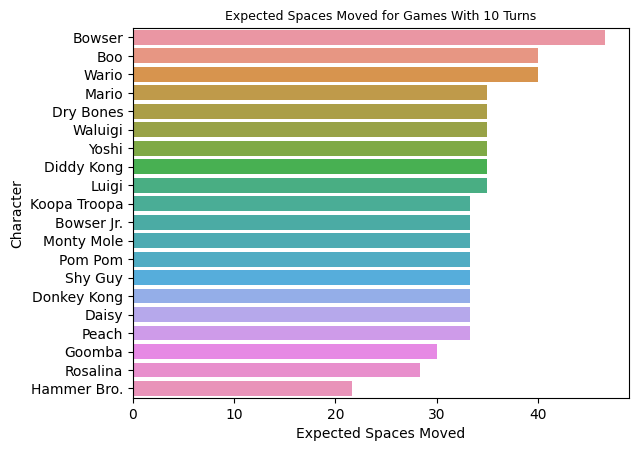

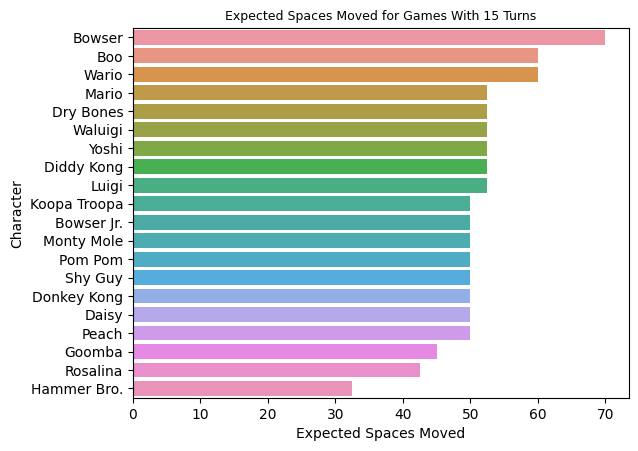

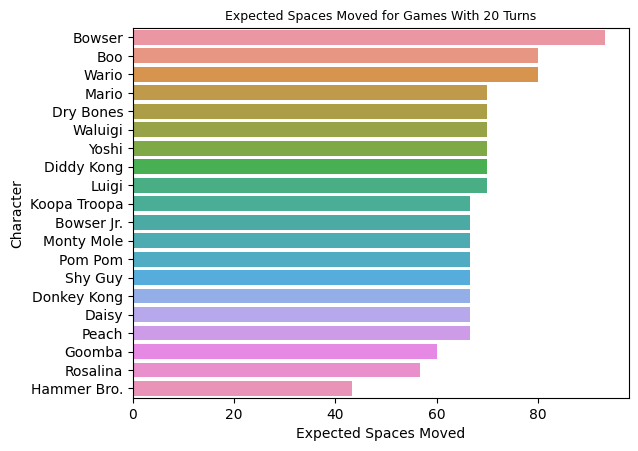

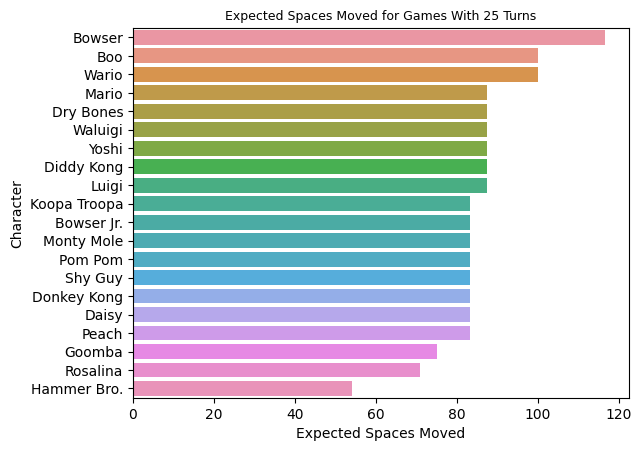

In [98]:
# Plot the results
desc_order = spaces_moved_df.sort_values(by=["expected_spaces_value"], ascending=False)["character"]
for i in turns:
    sns.barplot(data=spaces_moved_df, y="character", x=f"expected_spaces_{i}_turns", order=desc_order)
    plt.title(f"Expected Spaces Moved for Games With {i} Turns", fontsize=9)
    plt.xlabel("Expected Spaces Moved")
    plt.ylabel("Character")
    plt.show()

## Variance Explaination

Because each die roll is an independent random variable, we know the variance of n die rolls is the sum of the variances for each roll. The rolls are the same random variable so we know that the variance of spaces moved from rolling over a set of n rolls is

$\mathrm{Var}[T]$ = $\mathrm{Var}(X_{1} + X_{2} + ... + X_{n}) = n\mathrm{Var}[X]$,

where $T$ represents the sum of all rolls, `n` is the number of rolls, and $\mathrm{Var}[X]$ is the variance of a single roll.

To compute the variance of a single die roll, we can use this formula:
$\mathrm{Var}[X] = \mathbf{E}[X^2] - (\mathbf{E}[X])^2$

We already computed $\mathbf{E}[X]$ for each character and have the result stored in `expected_spaces_value` and `expected_coins_value`, so we just need to compute $\mathbf{E}[X^2]$.

We can solve for $\mathbf{E}[X^2]$ by using this formula:
$\mathbf{E}[X^2] = \sum_{i=1}^{6} \frac{n_i^2}{6}$

where $n_{i}$ is the roll outcome for the given character.

This means that

$\mathrm{Var}[X] = \sum_{i=1}^{6} \frac{n_i^2}{6} - (\mathbf{E}[X])^2$

<a id='spaces-moved-var'></a>
## Spaces Moved Variance

In [99]:
spaces_moved_variance_df = spaces_moved_df.copy()

# Compute the variance and standard deviation of the number of spaces moved
spaces_moved_variance_df["expectation_of_square"] = spaces_moved_variance_df[roll_columns].apply(lambda x: x**2).sum(axis=1) / 6
spaces_moved_variance_df["spaces_moved_variance"] = spaces_moved_variance_df["expectation_of_square"] - (spaces_moved_variance_df["expected_spaces_value"]) ** 2
spaces_moved_variance_df["spaces_moved_standard_deviation"] = spaces_moved_variance_df["spaces_moved_variance"] ** 0.5

# Preview the df
spaces_moved_variance_df.head()

,character,die_side_1,die_side_2,die_side_3,die_side_4,die_side_5,die_side_6,expected_spaces_value,expected_spaces_10_turns,expected_spaces_15_turns,expected_spaces_20_turns,expected_spaces_25_turns,expectation_of_square,spaces_moved_variance,spaces_moved_standard_deviation
0,Mario,1,3,3,3,5,6,3.500000,35.000000,52.5,70.000000,87.500000,14.833333,2.583333,1.607275
1,Luigi,1,1,1,5,6,7,3.500000,35.000000,52.5,70.000000,87.500000,18.833333,6.583333,2.565801
2,Peach,0,2,4,4,4,6,3.333333,33.333333,50.0,66.666667,83.333333,14.666667,3.555556,1.885618
3,Daisy,3,3,3,3,4,4,3.333333,33.333333,50.0,66.666667,83.333333,11.333333,0.222222,0.471405
4,Wario,0,0,6,6,6,6,4.000000,40.000000,60.0,80.000000,100.000000,24.000000,8.000000,2.828427


<a id='avg-coins-earned'></a>
## Average Coins Earned

The expected number of coins earned from rolling over a set of n rolls is 

$\mathbf{E}[nX] = n\mathbf{E}[X]$ = $n\sum \frac{1}{6} * n$, $\forall n \in \{n_1, n_2, n_3, n_4, n_5, n_6\}$

where `n` is the number of rolls and $n_{i}$ is the roll outcome. Since you do not receive coins when you roll a space outcome, we will have to encode this as 0.

In [100]:
# Replace non-coin rolls with 0 and make all columns numeric
roll_columns = [x for x in data.columns if "die_side_" in x]
coins_earned_df = data.copy()

# If the die_side_ column does not contain a "c" then replace it with 0
coins_earned_df[roll_columns] = coins_earned_df[roll_columns].astype(str)
coins_earned_df[roll_columns] = coins_earned_df[roll_columns].applymap(lambda x: x.replace("c", "") if "c" in x else 0)
coins_earned_df[roll_columns] = coins_earned_df[roll_columns].astype(int)

# Preview changes to the data
coins_earned_df.head()

,character,die_side_1,die_side_2,die_side_3,die_side_4,die_side_5,die_side_6
0,Mario,0,0,0,0,0,0
1,Luigi,0,0,0,0,0,0
2,Peach,0,0,0,0,0,0
3,Daisy,0,0,0,0,0,0
4,Wario,-2,-2,0,0,0,0


In [101]:
# Get the expected value of each roll
coins_earned_df["expected_coins_value"] = coins_earned_df.sum(axis=1, numeric_only=True) / 6

# Compute the expected number of spaces under different turn amounts
turns = [10, 15, 20, 25]
for i in turns:
    coins_earned_df[f"expected_coins_{i}_turns"] = coins_earned_df["expected_coins_value"] * i

print(f"Expected Coins Earned Per Character (Highest to Lowest)")

# Show the results
display(coins_earned_df.drop(columns=roll_columns).sort_values(by="expected_coins_value", ascending=False).reset_index(drop=True))

Expected Coins Earned Per Character (Highest to Lowest)


,character,expected_coins_value,expected_coins_10_turns,expected_coins_15_turns,expected_coins_20_turns,expected_coins_25_turns
0,Donkey Kong,0.833333,8.333333,12.5,16.666667,20.833333
1,Goomba,0.666667,6.666667,10.0,13.333333,16.666667
2,Rosalina,0.666667,6.666667,10.0,13.333333,16.666667
3,Hammer Bro.,0.500000,5.000000,7.5,10.000000,12.500000
4,Diddy Kong,0.333333,3.333333,5.0,6.666667,8.333333
5,Monty Mole,0.166667,1.666667,2.5,3.333333,4.166667
6,Shy Guy,0.000000,0.000000,0.0,0.000000,0.000000
7,Dry Bones,0.000000,0.000000,0.0,0.000000,0.000000
8,Bowser Jr.,0.000000,0.000000,0.0,0.000000,0.000000
9,Koopa Troopa,0.000000,0.000000,0.0,0.000000,0.000000


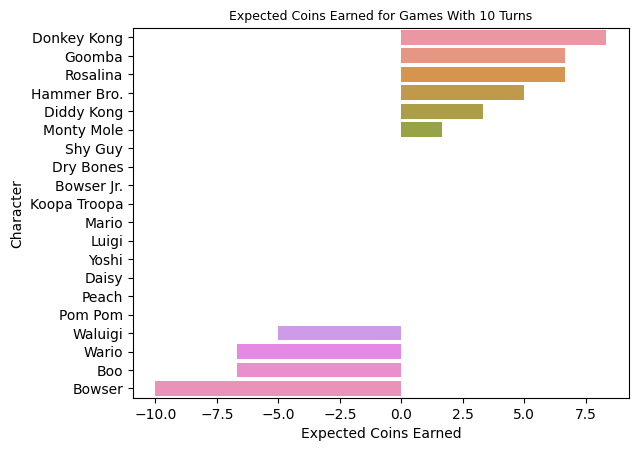

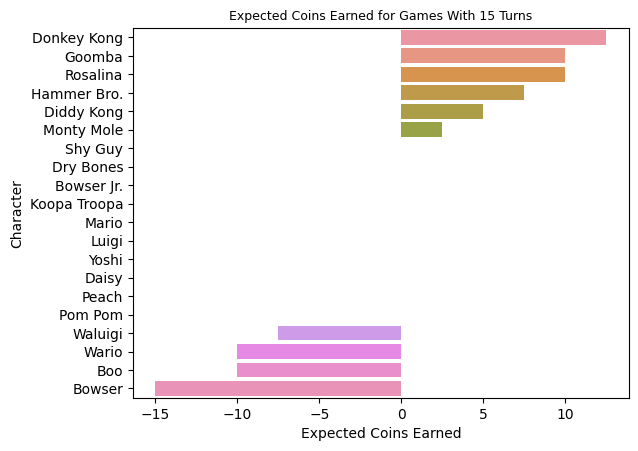

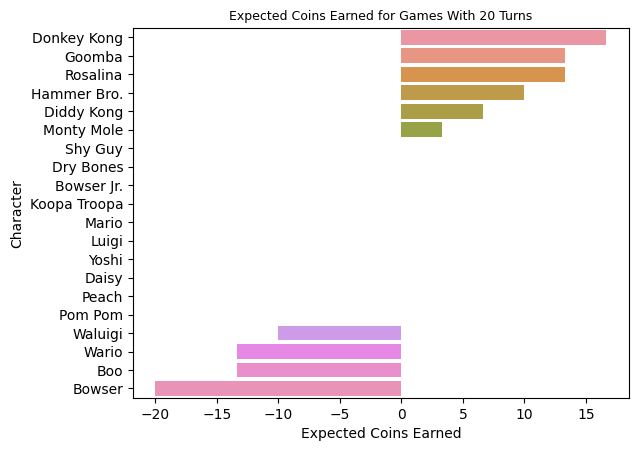

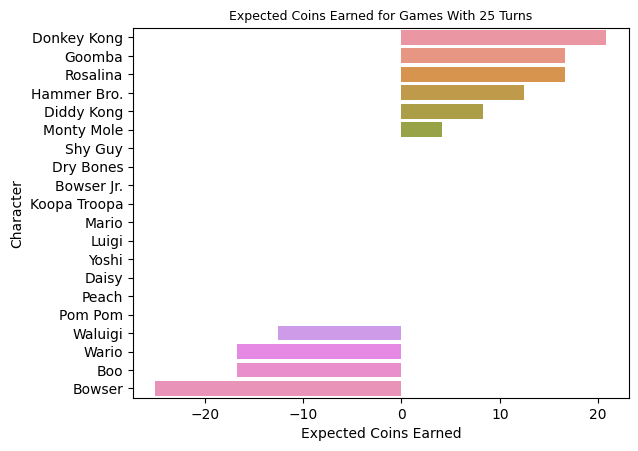

In [102]:
# Plot the results
desc_order = coins_earned_df.sort_values(by=["expected_coins_value"], ascending=False)["character"]
for i in turns:
    sns.barplot(data=coins_earned_df, y="character", x=f"expected_coins_{i}_turns", order=desc_order)
    plt.title(f"Expected Coins Earned for Games With {i} Turns", fontsize=9)
    plt.xlabel("Expected Coins Earned")
    plt.ylabel("Character")
    plt.show()

<a id='coins-earned-var'></a>
## Coins Earned Variance

In [103]:
coins_earned_variance_df = coins_earned_df.copy()

# Compute the variance and standard deviation of the number of spaces moved
coins_earned_variance_df["expectation_of_square"] = coins_earned_variance_df[roll_columns].apply(lambda x: x**2).sum(axis=1) / 6
coins_earned_variance_df["coins_earned_variance"] = coins_earned_variance_df["expectation_of_square"] - (coins_earned_variance_df["expected_coins_value"]) ** 2
coins_earned_variance_df["coins_earned_standard_deviation"] = coins_earned_variance_df["coins_earned_variance"] ** 0.5

# Preview the df
coins_earned_variance_df.head()

,character,die_side_1,die_side_2,die_side_3,die_side_4,die_side_5,die_side_6,expected_coins_value,expected_coins_10_turns,expected_coins_15_turns,expected_coins_20_turns,expected_coins_25_turns,expectation_of_square,coins_earned_variance,coins_earned_standard_deviation
0,Mario,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,Luigi,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,Peach,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,Daisy,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,Wario,-2,-2,0,0,0,0,-0.666667,-6.666667,-10.0,-13.333333,-16.666667,1.333333,0.888889,0.942809


<a id='conclusion'></a>
## Conclusion

Here we present all of our computations combined with the original data. You can use this table to help inform your character selection.


In [104]:
spaces_moved_df

,character,die_side_1,die_side_2,die_side_3,die_side_4,die_side_5,die_side_6,expected_spaces_value,expected_spaces_10_turns,expected_spaces_15_turns,expected_spaces_20_turns,expected_spaces_25_turns
0,Mario,1,3,3,3,5,6,3.500000,35.000000,52.5,70.000000,87.500000
1,Luigi,1,1,1,5,6,7,3.500000,35.000000,52.5,70.000000,87.500000
2,Peach,0,2,4,4,4,6,3.333333,33.333333,50.0,66.666667,83.333333
3,Daisy,3,3,3,3,4,4,3.333333,33.333333,50.0,66.666667,83.333333
4,Wario,0,0,6,6,6,6,4.000000,40.000000,60.0,80.000000,100.000000
5,Waluigi,0,1,3,5,5,7,3.500000,35.000000,52.5,70.000000,87.500000
6,Yoshi,0,1,3,5,5,7,3.500000,35.000000,52.5,70.000000,87.500000
7,Rosalina,0,0,2,3,4,8,2.833333,28.333333,42.5,56.666667,70.833333
8,Donkey Kong,0,0,0,0,10,10,3.333333,33.333333,50.0,66.666667,83.333333
9,Diddy Kong,0,0,0,7,7,7,3.500000,35.000000,52.5,70.000000,87.500000


In [107]:
# Show full output
pd.set_option('display.max_columns', None)

# Combine all the dataframes
combined = data.merge(spaces_moved_df[["character", "expected_spaces_value", "expected_spaces_10_turns", "expected_spaces_15_turns", "expected_spaces_20_turns", "expected_spaces_25_turns"]], on="character")
combined = combined.merge(coins_earned_df[["character", "expected_coins_value", "expected_coins_10_turns", "expected_coins_15_turns", "expected_coins_20_turns", "expected_coins_25_turns"]], on="character")
combined = combined.merge(spaces_moved_variance_df[["character", "spaces_moved_variance", "spaces_moved_standard_deviation"]], on="character")
combined = combined.merge(coins_earned_variance_df[["character", "coins_earned_variance", "coins_earned_standard_deviation"]], on="character")
combined

,character,die_side_1,die_side_2,die_side_3,die_side_4,die_side_5,die_side_6,expected_spaces_value,expected_spaces_10_turns,expected_spaces_15_turns,expected_spaces_20_turns,expected_spaces_25_turns,expected_coins_value,expected_coins_10_turns,expected_coins_15_turns,expected_coins_20_turns,expected_coins_25_turns,spaces_moved_variance,spaces_moved_standard_deviation,coins_earned_variance,coins_earned_standard_deviation
0,Mario,1,3,3,3,5,6,3.500000,35.000000,52.5,70.000000,87.500000,0.000000,0.000000,0.0,0.000000,0.000000,2.583333,1.607275,0.000000,0.000000
1,Luigi,1,1,1,5,6,7,3.500000,35.000000,52.5,70.000000,87.500000,0.000000,0.000000,0.0,0.000000,0.000000,6.583333,2.565801,0.000000,0.000000
2,Peach,0,2,4,4,4,6,3.333333,33.333333,50.0,66.666667,83.333333,0.000000,0.000000,0.0,0.000000,0.000000,3.555556,1.885618,0.000000,0.000000
3,Daisy,3,3,3,3,4,4,3.333333,33.333333,50.0,66.666667,83.333333,0.000000,0.000000,0.0,0.000000,0.000000,0.222222,0.471405,0.000000,0.000000
4,Wario,-2c,-2c,6,6,6,6,4.000000,40.000000,60.0,80.000000,100.000000,-0.666667,-6.666667,-10.0,-13.333333,-16.666667,8.000000,2.828427,0.888889,0.942809
5,Waluigi,-3c,1,3,5,5,7,3.500000,35.000000,52.5,70.000000,87.500000,-0.500000,-5.000000,-7.5,-10.000000,-12.500000,5.916667,2.432420,1.250000,1.118034
6,Yoshi,0,1,3,5,5,7,3.500000,35.000000,52.5,70.000000,87.500000,0.000000,0.000000,0.0,0.000000,0.000000,5.916667,2.432420,0.000000,0.000000
7,Rosalina,2c,2c,2,3,4,8,2.833333,28.333333,42.5,56.666667,70.833333,0.666667,6.666667,10.0,13.333333,16.666667,7.472222,2.733537,0.888889,0.942809
8,Donkey Kong,5c,0,0,0,10,10,3.333333,33.333333,50.0,66.666667,83.333333,0.833333,8.333333,12.5,16.666667,20.833333,22.222222,4.714045,3.472222,1.863390
9,Diddy Kong,2c,0,0,7,7,7,3.500000,35.000000,52.5,70.000000,87.500000,0.333333,3.333333,5.0,6.666667,8.333333,12.250000,3.500000,0.555556,0.745356
